In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keplergl import KeplerGl

In [2]:
data = pd.read_csv('trucks/Trucks.txt', sep=";", header=None)
data.columns = ['obj_id', 'traj_id', 'date', 'time_ts', 'lat', 'lon', 'x', 'y']

In [3]:
#change granularity from h:m:s to h:m
data['time_ts'] = data['time_ts'].str[:5]

#bucket the data
#somehow average in timestamps
#each truck starts and stops at a given time on a given date... 


In [4]:
# day_data = data[data['date'] == '10/09/2002']
# for obj in day_data['obj_id'].unique():
#     truck_df = day_data[data['obj_id'] == obj]
#     print(min(truck_df['time_ts']), max(truck_df['time_ts']))
# #     print(truck_df['date'].unique())

In [5]:
data.head()

,obj_id,traj_id,date,time_ts,lat,lon,x,y
0,862,1,10/09/2002,09:15,23.845089,38.018470,486253.8,4207588.1
1,862,1,10/09/2002,09:16,23.845179,38.018069,486261.6,4207543.6
2,862,1,10/09/2002,09:16,23.845530,38.018241,486292.4,4207562.6
3,862,1,10/09/2002,09:17,23.845499,38.017440,486289.6,4207473.8
4,862,1,10/09/2002,09:17,23.844780,38.015609,486226.1,4207270.7


In [6]:
data['obj_id'].unique()

array([862, 863, 864, 865, 866, 867, 869, 870, 872, 873, 874, 875, 876,
       878, 879, 880, 882, 883, 884, 885, 887, 888, 889, 891, 892, 893,
       894, 895, 896, 897, 898, 899, 900, 901, 903, 904, 905, 906, 908,
       910, 911, 912, 913, 914, 915, 916, 917, 918, 920, 921])

In [7]:
print(data['time_ts'].nunique(), min(data['time_ts']), max(data['time_ts']))


1374 00:01 23:58


In [8]:
truck_data = data[data['obj_id'] == 862]
truck_data.head()

,obj_id,traj_id,date,time_ts,lat,lon,x,y
0,862,1,10/09/2002,09:15,23.845089,38.018470,486253.8,4207588.1
1,862,1,10/09/2002,09:16,23.845179,38.018069,486261.6,4207543.6
2,862,1,10/09/2002,09:16,23.845530,38.018241,486292.4,4207562.6
3,862,1,10/09/2002,09:17,23.845499,38.017440,486289.6,4207473.8
4,862,1,10/09/2002,09:17,23.844780,38.015609,486226.1,4207270.7


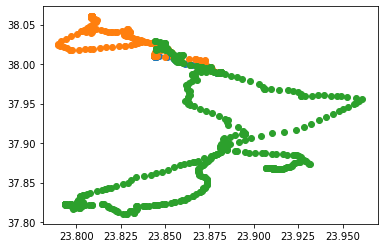

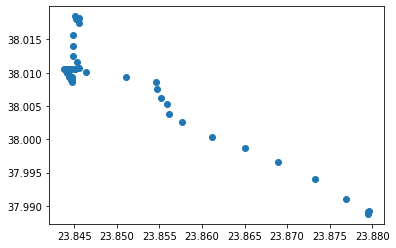

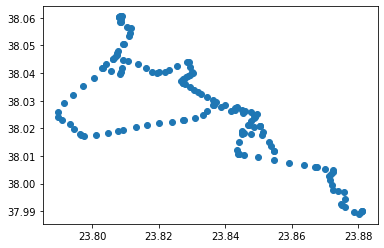

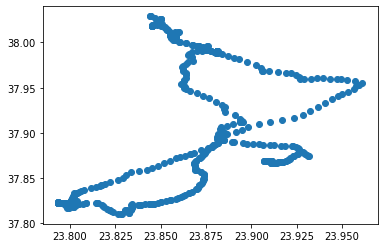

In [9]:
trajectories = []
for date in truck_data['date'].unique():
    day_data = truck_data[truck_data['date'] == date][['lat', 'lon']].to_numpy()
    
    trajectories.append(day_data)

plt.figure()
for traj in trajectories:
    plt.scatter(traj[:,0], traj[:,1])

for traj in trajectories:
    plt.figure()
    plt.scatter(traj[:,0], traj[:,1])

In [13]:
map_2 = KeplerGl(height=800, data={"data_1": data})
map_2

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'data_1':         obj_id  traj_id        date time_ts        lat        lon         x  \
0     …